# Text Three Ways
### Import libraries
### Collect ten text documents about India

In [2]:
import pandas as pd
import os
import numpy as np
import pprint

documents = []
path = 'india_texts/'
pp = pprint.PrettyPrinter(width=41, compact=True)

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path) if not fn.startswith('.')])

pp.pprint(len(filenames)) # count files in corpus
pp.pprint(filenames[:10]) # print names of 1st ten files in corpus

10
['india_texts/ modern_india.txt',
 'india_texts/autobiography_of_lutfallah.txt',
 'india_texts/forty_one_years_in_india.txt',
 'india_texts/india_and_its_inhabitant.txt',
 'india_texts/indian_nationalism.txt',
 'india_texts/indian_revolt.txt',
 'india_texts/my_trip_to_india.txt',
 'india_texts/observations_on_india.txt',
 'india_texts/our_little_hindu_cousin.txt',
 'india_texts/rebellion_of_india.txt']


### Build a topic model of the documents using sklearn

In [4]:
import sklearn.feature_extraction.text as text

vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1)
dtm=vectorizer.fit_transform(filenames).toarray() # defines document term matrix

vocab=np.array(vectorizer.get_feature_names())

### Print the shape of document-term matrix and number of tokens

In [6]:
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (10, 30125). Number of tokens 294321


### Decompose the texts

In [8]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)

### Transform the data matrix

In [9]:
document_topic_distributions = model.fit_transform(dtm)

### Build vocabulary for 100 topics

In [11]:
vocabulary = vectorizer.get_feature_names()
# (# topics, # vocabulary)
assert model.components_.shape == (100, len(vocabulary))
# (# documents, # topics)
assert document_topic_distributions.shape == (dtm.shape[0], 100)

### Print data frame of the topics

In [12]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

                00        000      0001  00025764414      000z       001  \
Topic 0   0.252668   0.326016  0.193815     0.184454  0.240511  0.190912   
Topic 1   0.194870   0.385581  0.201766     0.185510  0.209392  0.222468   
Topic 2   0.193778   0.289095  0.175349     0.199127  0.202354  0.238306   
Topic 3   0.220210   0.245785  0.229989     0.200167  0.237800  0.187043   
Topic 4   0.231448   0.293606  0.218367     0.214358  0.214656  0.214233   
...            ...        ...       ...          ...       ...       ...   
Topic 95  0.216842   0.262371  0.246325     0.201665  0.194838  0.209352   
Topic 96  0.213193   0.300625  0.242852     0.209623  0.213859  0.194051   
Topic 97  0.210592   0.301532  0.187218     0.187375  0.201832  0.210097   
Topic 98  0.194201   0.263194  0.209925     0.198157  0.254072  0.207574   
Topic 99  2.360300  14.881024  0.232137     0.213009  0.254194  0.221892   

               002  0039059952       005       00m  ...      ﬂown      ﬂows  \
Topic 0 

### Print the most common vocabulary words of topic 8

In [13]:
topic_word_distributions.loc['Topic 8'].sort_values(ascending=False).head(18)

india         0.670175
great         0.541829
having        0.539504
time          0.526772
man           0.503255
country       0.477427
men           0.471237
general       0.465671
day           0.463835
place         0.461056
government    0.451354
little        0.450688
years         0.446292
native        0.438086
good          0.434163
said          0.429140
sir           0.421204
people        0.417507
Name: Topic 8, dtype: float64

### Print document distribution by topic

In [14]:
document_topic_distributions = pd.DataFrame(
    document_topic_distributions, columns=topic_names)
print(document_topic_distributions)

        Topic 0       Topic 1       Topic 2       Topic 3       Topic 4  \
0  2.996883e-07  2.996883e-07  2.996883e-07  2.996883e-07  2.996883e-07   
1  2.105086e-07  2.105086e-07  2.105086e-07  2.105086e-07  2.105086e-07   
2  1.298853e-07  1.298853e-07  1.298853e-07  1.298853e-07  1.298853e-07   
3  2.856000e-07  2.856000e-07  2.856000e-07  2.856000e-07  2.856000e-07   
4  8.427440e-07  8.427440e-07  8.427440e-07  8.427440e-07  8.427440e-07   
5  1.280246e-06  1.280246e-06  1.280246e-06  1.280246e-06  1.280246e-06   
6  2.669443e-07  2.669443e-07  2.669443e-07  2.669443e-07  2.669443e-07   
7  3.495159e-07  3.495159e-07  3.495159e-07  3.495159e-07  3.495159e-07   
8  1.009387e-06  1.009387e-06  1.009387e-06  1.009387e-06  1.009387e-06   
9  1.724733e-06  1.724733e-06  1.724733e-06  1.724733e-06  1.724733e-06   

        Topic 5       Topic 6       Topic 7       Topic 8       Topic 9  ...  \
0  2.996883e-07  2.996883e-07  2.996883e-07  2.996883e-07  2.996883e-07  ...   
1  2.105086e-0

### Print the most common vocabulary of topic 2

In [15]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words

india         0.876780
time          0.502606
men           0.468177
man           0.449749
great         0.409246
british       0.385231
government    0.378595
enemy         0.374150
country       0.367019
indian        0.365252
said          0.362239
general       0.359359
little        0.357621
native        0.353936
years         0.353520
life          0.346933
near          0.346478
troops        0.345525
Name: Topic 2, dtype: float64

### Generate a word cloud of topic 2

00             0.193778
000            0.289095
0001           0.175349
00025764414    0.199127
000z           0.202354
001            0.238306
002            0.186073
0039059952     0.184000
005            0.206926
00m            0.192200
01             0.241332
010            0.202145
011            0.203596
013            0.190202
014            0.219638
017            0.196655
019            0.182218
01t            0.233900
02             0.217441
020914055      0.206414
Name: Topic 2, dtype: float64


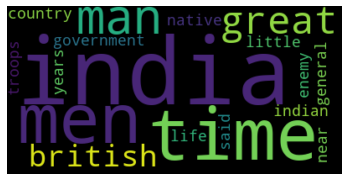

In [16]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Download sentiment analysis package

In [17]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nada/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Get a segment fragment from the document "Autobiography of Lutfallah" for analysis

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# the variable 'message_text' now contains the text we will analyze.
message_text = '''the sentiments of. eastern nations, know the intense
anxiety which every man, whether Mohamedan or
Hindu, feels to have a son to bear his. name, and
transmit it (as the English poet says) "to ages yet
unborn." Such persons will be able to enter into
the state of my father's feelings on finding himself,
at an advanced period of life, a widower, and with
the dreary prospect of descending into the grave
the last male scion of his race. Had he consulted
only his own inclinations, he would have been con-
tent to suffer this fate, miserable as it was, rather
than endeavour to forget in the society of a second
wife the severe loss which he had sustained in the
death of the former partner of his bosom. But, at
the earnest solicitation of his friends, he was induced,
at the end of a year of widowhood, to wed a girl
of seventeen, exquisite in beauty, elegant in manners,
perfect in virtue and goodness, and of a family fully
equal to his own, both as regarded sacred and social
advantages. Reader, she was my mother; and you
will, therefore, I am sure, forgive me if I display
more than ordinary warmth in paying this tribute
to her departed worth.
It was not till three years after he had contracted
this alliance, that the tree of my father's hope became
fruitful, and that I, the humble author of these
memoirs, made my appearance on the stage of exist-
ence, to gladden the hearts of my fond parents and
of all those who felt an interest in their happiness.'''

### Get the polarity scores of the text in a dictionary

In [27]:
print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(message_text)
for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

the sentiments of. eastern nations, know the intense
anxiety which every man, whether Mohamedan or
Hindu, feels to have a son to bear his. name, and
transmit it (as the English poet says) "to ages yet
unborn." Such persons will be able to enter into
the state of my father's feelings on finding himself,
at an advanced period of life, a widower, and with
the dreary prospect of descending into the grave
the last male scion of his race. Had he consulted
only his own inclinations, he would have been con-
tent to suffer this fate, miserable as it was, rather
than endeavour to forget in the society of a second
wife the severe loss which he had sustained in the
death of the former partner of his bosom. But, at
the earnest solicitation of his friends, he was induced,
at the end of a year of widowhood, to wed a girl
of seventeen, exquisite in beauty, elegant in manners,
perfect in virtue and goodness, and of a family fully
equal to his own, both as regarded sacred and social
advantages. Reader, 

### Initialize Vader and Sentiment Intensity Analyzer
### Use pickle fuction for English language
### Tokenize into sentences, and get polarity scores for each

In [29]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

# Next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

# We will also initialize our 'english.pickle' function and give it a short name

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
message_text = '''the sentiments of. eastern nations, know the intense
anxiety which every man, whether Mohamedan or
Hindu, feels to have a son to bear his. name, and
transmit it (as the English poet says) "to ages yet
unborn." Such persons will be able to enter into
the state of my father's feelings on finding himself,
at an advanced period of life, a widower, and with
the dreary prospect of descending into the grave
the last male scion of his race. Had he consulted
only his own inclinations, he would have been con-
tent to suffer this fate, miserable as it was, rather
than endeavour to forget in the society of a second
wife the severe loss which he had sustained in the
death of the former partner of his bosom. But, at
the earnest solicitation of his friends, he was induced,
at the end of a year of widowhood, to wed a girl
of seventeen, exquisite in beauty, elegant in manners,
perfect in virtue and goodness, and of a family fully
equal to his own, both as regarded sacred and social
advantages. Reader, she was my mother; and you
will, therefore, I am sure, forgive me if I display
more than ordinary warmth in paying this tribute
to her departed worth.
It was not till three years after he had contracted
this alliance, that the tree of my father's hope became
fruitful, and that I, the humble author of these
memoirs, made my appearance on the stage of exist-
ence, to gladden the hearts of my fond parents and
of all those who felt an interest in their happiness.'''
# The tokenize method breaks up the paragraph into a list of strings. In this example, note that the tokenizer is confused by the absence of spaces after periods and actually fails to break up sentences in two instances. How might you fix that?

sentences = tokenizer.tokenize(message_text)

# We add the additional step of iterating through the list of sentences and calculating and printing polarity scores for each one.

for sentence in sentences:
        print(sentence)
        scores = sid.polarity_scores(sentence)
        for key in sorted(scores):
                print('{0}: {1}, '.format(key, scores[key]), end='')
        print()

the sentiments of.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
eastern nations, know the intense
anxiety which every man, whether Mohamedan or
Hindu, feels to have a son to bear his.
compound: -0.1027, neg: 0.081, neu: 0.857, pos: 0.062, 
name, and
transmit it (as the English poet says) "to ages yet
unborn."
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Such persons will be able to enter into
the state of my father's feelings on finding himself,
at an advanced period of life, a widower, and with
the dreary prospect of descending into the grave
the last male scion of his race.
compound: -0.2023, neg: 0.108, neu: 0.801, pos: 0.091, 
Had he consulted
only his own inclinations, he would have been con-
tent to suffer this fate, miserable as it was, rather
than endeavour to forget in the society of a second
wife the severe loss which he had sustained in the
death of the former partner of his bosom.
compound: -0.9468, neg: 0.288, neu: 0.712, pos: 0.0, 
But, at
the earnest solicitation of hi

### Import libraries for generating text

In [30]:
import markovify
import random

### Read the text file " Autobiography of Lutfallah"

In [31]:
with open("india_texts/autobiography_of_lutfallah.txt",encoding='utf-8') as f:
    text = f.read()

### Generate a sentence using one of the documents

In [32]:
text_model = markovify.Text(text)

In [33]:
print( text_model.make_sentence() )

It happened that this small boat.


### Use OS to get the text files names

In [55]:
import os
path = 'india_texts/'

with os.scandir(path) as entries:
    for entry in entries:     
        if not entry.name.startswith('.'):
            print(entry.name)
            f = open(f'india_texts/autobiography_of_lutfallah.txt',encoding ='utf-8' ) 
            text += f.read()

rebellion_of_india.txt
our_little_hindu_cousin.txt
indian_nationalism.txt
indian_revolt.txt
observations_on_india.txt
modern_india.txt
autobiography_of_lutfallah.txt
my_trip_to_india.txt
india_and_its_inhabitant.txt
forty_one_years_in_india.txt


### Generate a sentence

In [56]:
text_model = markovify.Text(text)
print( text_model.make_sentence() )

He asked me if I could not speak my language.


### Generate a longer text fragment using all of the documents

In [57]:
novel = ''
while (len( novel.split(" ")) < 500):
  for i in range(random.randrange(3,9)):
    novel += text_model.make_sentence() + " "
  novel += "\n\n"
    # print(text_model.make_sentence()

print(novel)

The rooms were then locked and sealed up again, and led their prayers to the mosque. So again I gave him some days before. 125 the two ladies. The pile now being ready, the corpse washed by that element. The inhabitants are wealthy. I asked one of the death of the lookers on. 409 my chief of Amran, attended with success, there were lying on my master, and that all his state, wealth, and talent, perhaps of French origin, but well qualified in the English secretary, Mr. ~T. J. A. Scott, and of obtaining L 2 ## p. 

From this we started at about eight o'clock in the camp, to my monotonous life at the public domain, meaning that it was ceded by them to be under the tree of my fond parents and of the Court. The beginning of 1817. We gladly received this order, and commenced folding up our books, etc. In the afternoon at his elbow, and my box, though mentally I consigned him to be coaled, we stopped one day. It is under the tree, whence we had a few days; and then condescended to say to them